In [2]:
"""
Created on Wed Aug 12 18:29:09 2022
Gravity anomaly forward by two ways
@author: chens
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
# local imports
import freqinv.su as su

In [3]:
## 1. generate a model 
def gen_grav(shape = (100, 100)):

    dx = 6000/8.
    dy = 6000/8.
    dz = 1900/8.
    model = [su.Prism(-1000, 1000, -1000, 1000, 100, 2000, {'density': 1000}),
            su.Prism(-4000, -3000, -4000, -3000, 100, 2000, {'density': -900}),
            su.Prism(2000, 4000, 3000, 4000, 100, 2000, {'density': 1300})]
    prism1 = su.Prism(-3000+3*dx, -3000+4*dx, -3000+7*dy, -3000+8*dy, 100+4*dz, 100+5*dz, {'density': 2000})
    prism2 = su.Prism(-3000+2*dx, -3000+3*dx, -3000+2*dy, -3000+3*dy, 100+4*dz, 100+5*dz, {'density': 2000})
    model = [prism1,prism2]
    nzyx = [8,8,8]
    source_volume = [-3000, 3000, -3000, 3000, 100, 2000]
    xp, yp, zp = su.gridderRegular((-5000, 5000, -5000, 5000), shape, z=0)
	
	#the space domain approach (Nagy et al., 2000, 2002)
    field0 = su.gz(xp, yp, zp, model) 
	
	#the wavenumber domain approach (this study)
    fieldfreq = su.gzfreq(xp, yp, zp, shape, model) 
	
    #field1 = giutils.contaminate(field0, 0.05, percent = True)
    return field0, fieldfreq, xp, yp, zp

Hello freqinv!
0.1886672109350484


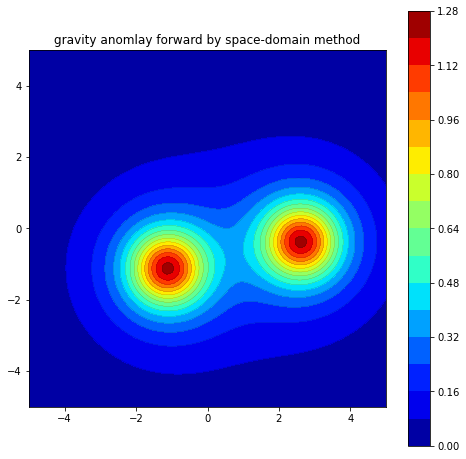

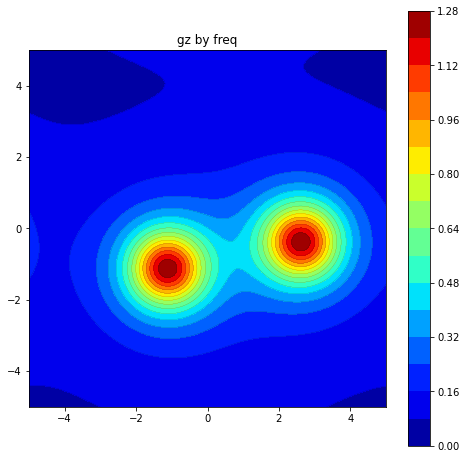

In [4]:
if __name__ == '__main__':
    
    print('Hello freqinv!')
    shape = (128, 128)
    gu, gulist, xp, yp, zp = gen_grav(shape)
    print(np.linalg.norm(gu-gulist)/np.linalg.norm(gu))

    plt.figure(figsize=(8, 8))
    plt.axis('scaled')
    plt.title('gravity anomlay forward by space-domain method')
    levels = su.contourf(yp * 0.001, xp * 0.001, gu, shape, 15)
    cb = plt.colorbar()
    su.contour(yp * 0.001, xp * 0.001, gu, shape,
                levels, clabel=False, linewidth=0.1)
    plt.show()

    plt.figure(figsize=(8, 8))
    plt.axis('scaled')
    plt.title('gz by freq')
    levels = su.contourf(yp * 0.001, xp * 0.001, gulist, shape, 15)
    cb = plt.colorbar()
    su.contour(yp * 0.001, xp * 0.001, gulist, shape,
                levels, clabel=False, linewidth=0.1)
    plt.show()
    df1 = pd.DataFrame(columns=['x','y','z','g1','g2'])
    df1['x'] = yp
    df1['y'] = xp
    df1['z'] = zp
    df1['g1'] = gu
    df1['g2'] = gulist
    #df1.to_csv('.\\freq.txt')